# Ejemplo Extraccion Basica de Caracteristicas en voz: 
## Tratamiento de señales 3-Virtual UdeA
### Paula Andrea Pérez Toro

In [56]:

import scipy
from scipy.io.wavfile import read # libreria para lectura de archivos de audio
from IPython.display import Audio # para escuchar la senal
import numpy as np
import matplotlib.pyplot as plt # libreria usada para graficas
from sklearn import preprocessing


Lectura del audio

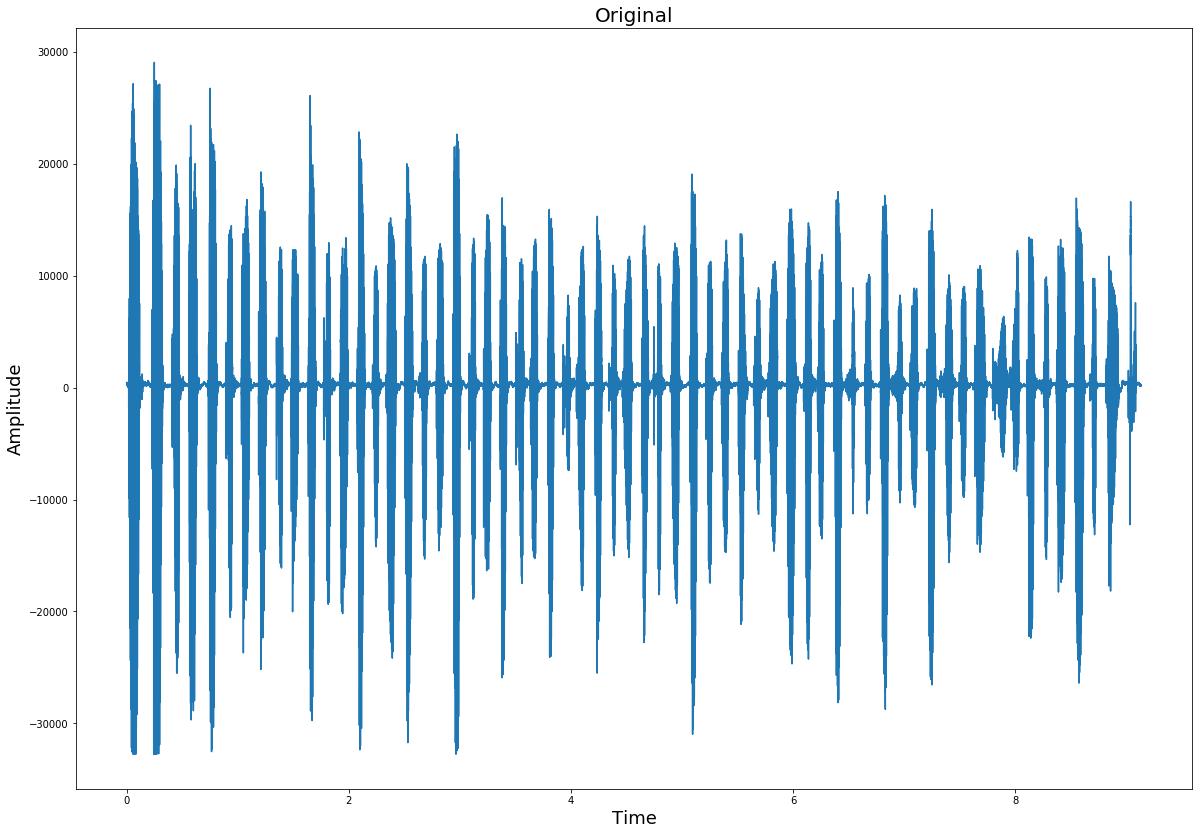

In [112]:
file_audio=('030YHC_S1_DDK1.wav') # Ruta del archivo con la senal
#file_audio=('PDpatient.wav') # Ruta del archivo con la senal
fs, audio_input=read(file_audio) # Cargar el archivo

t=np.arange(0, float(len(audio_input))/fs, 1.0/fs) # Vector de tiempo

plt.figure(figsize=(20,14))
plt.plot(t,audio_input) # Dibujar la grafica
# Los siguientes dos comandos dibujan las etiquetas de los ejes
plt.xlabel('Time',fontsize=18) # Etiqueta eje X
plt.ylabel('Amplitude',fontsize=18) # Etiqueta eje Y
plt.title('Original',fontsize=20)


Audio(audio_input, rate=fs) # para escuchar la senal, si se desea



In [113]:
print('Su número de muestras es: {}'.format(len(audio_input)))

Su número de muestras es: 146158


In [114]:
print('Su número frecuencia de muestreo es: {} Hz'.format(fs))

Su número frecuencia de muestreo es: 16000 Hz


In [115]:
print('Su longitud en tiempo: {} seg'.format(float(len(audio_input))/fs)) 

Su longitud en tiempo: 9.134875 seg


#### Estadarización

/home/paulaperezt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int16 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/paulaperezt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int16 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


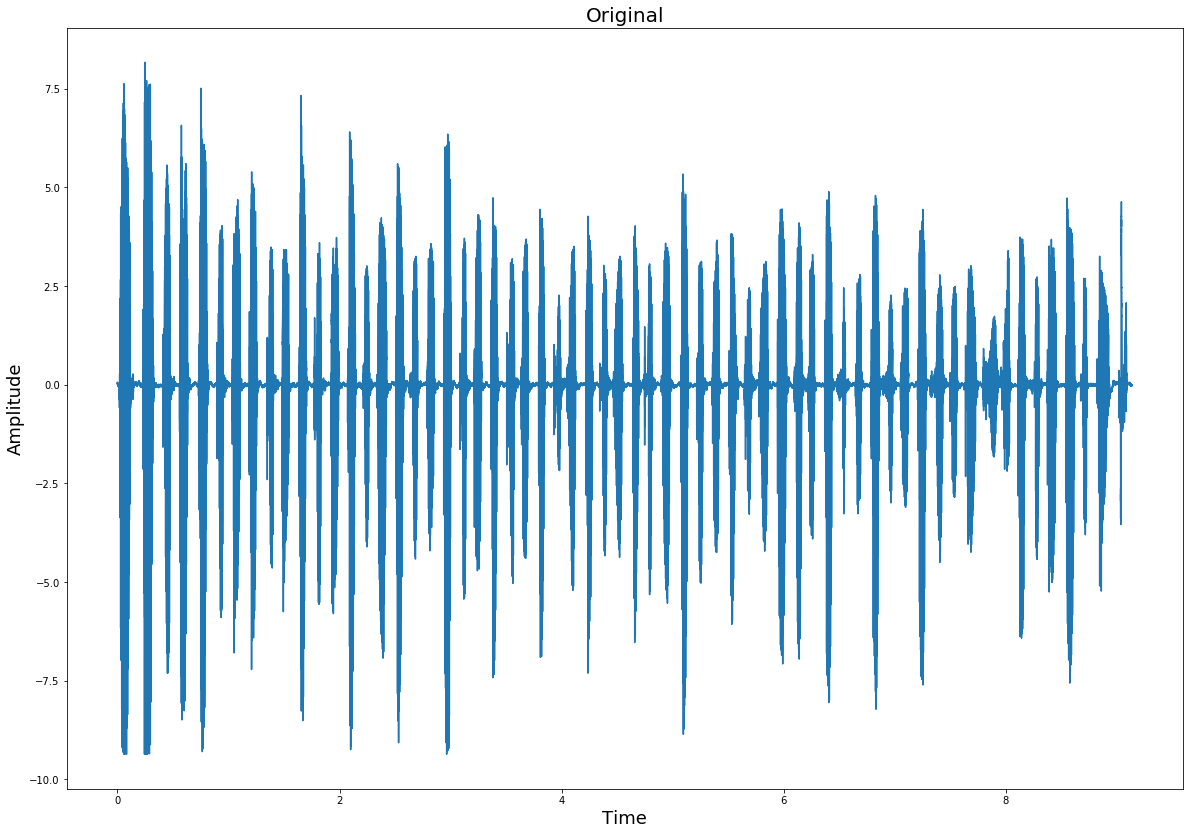

In [116]:
#Estandarización
scaler = preprocessing.StandardScaler()
standard_X = np.hstack(scaler.fit_transform(np.vstack(audio_input)))

plt.figure(figsize=(20,14))

plt.plot(t,standard_X ) # Dibujar la grafica
# Los siguientes dos comandos dibujan las etiquetas de los ejes
plt.xlabel('Time',fontsize=18) # Etiqueta eje X
plt.ylabel('Amplitude',fontsize=18) # Etiqueta eje Y
plt.title('Original',fontsize=20)


Audio(standard_X , rate=fs) # para escuchar la senal, si se desea


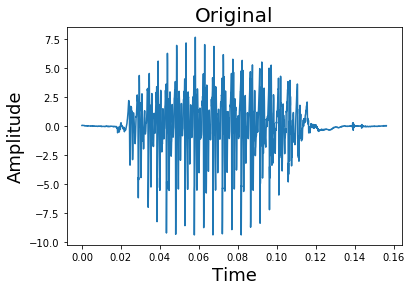

In [117]:

plt.plot(t[0:2500],standard_X[0:2500] ) # Dibujar la grafica
# Los siguientes dos comandos dibujan las etiquetas de los ejes
plt.xlabel('Time',fontsize=18) # Etiqueta eje X
plt.ylabel('Amplitude',fontsize=18) # Etiqueta eje Y
plt.title('Original',fontsize=20)


Audio(standard_X[0:2500] , rate=fs) # para escuchar la senal, si se desea


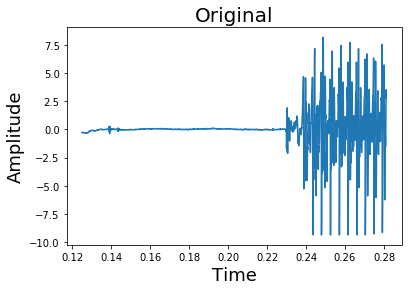

In [118]:

plt.plot(t[2000:4500],standard_X[2000:4500] ) # Dibujar la grafica
# Los siguientes dos comandos dibujan las etiquetas de los ejes
plt.xlabel('Time',fontsize=18) # Etiqueta eje X
plt.ylabel('Amplitude',fontsize=18) # Etiqueta eje Y
plt.title('Original',fontsize=20)


Audio(standard_X[2000:4500] , rate=fs) # para escuchar la senal, si se desea

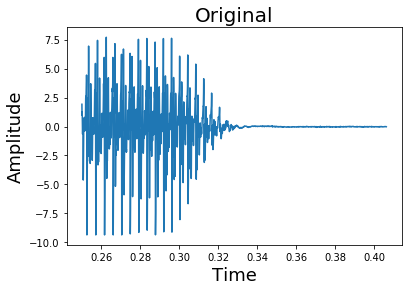

In [119]:

plt.plot(t[4000:6500],standard_X[4000:6500] ) # Dibujar la grafica
# Los siguientes dos comandos dibujan las etiquetas de los ejes
plt.xlabel('Time',fontsize=18) # Etiqueta eje X
plt.ylabel('Amplitude',fontsize=18) # Etiqueta eje Y
plt.title('Original',fontsize=20)


Audio(standard_X[4000:6500] , rate=fs) # para escuchar la senal, si se desea

#### Enventanado

In [120]:
def extract_windows(signal, size, step):
    # make sure we have a mono signal
    assert(signal.ndim == 1)

   
    n_frames = int((len(signal) - size) / step)
   
    # extract frames
    windows = [signal[i * step : i * step + size]
               for i in range(n_frames)]
   
    # stack (each row is a window)
    return np.vstack(windows)

In [121]:
size=int(0.020*fs)
step=int(0.010*fs)

In [122]:
frames_original=extract_windows(standard_X, size, step)
len(frames_original)

911

In [123]:
frames = frames_original*np.hamming(size)

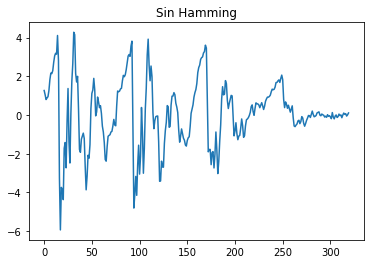

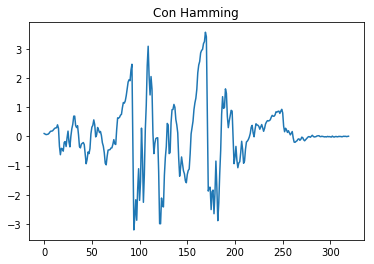

In [124]:
plt.title('Sin Hamming')
plt.plot(frames_original[10])
plt.show()
plt.title('Con Hamming')

plt.plot(frames[10])
plt.show()

#### Energía

In [125]:
import scipy.integrate as integrate

$$  E=\int _{-\infty} ^{\infty} x^{2}(t)\,dt $$

Calcularemos la energia por cada ventana y la guardaremos

In [126]:
1/fs

6.25e-05

In [127]:
energia=[]
for fr in frames:

    #Cuadrado de la señal
    x2 = fr**2

    #t
    
    t=np.arange(0, float(len(fr))/fs, 1.0/fs) # Vector de tiempo
    
    #integral
    energia.append(integrate.simps(x2,t))



Como caracteristica estatica podemos obtener diferentes estadisticos como: media, desviación estandar, Skewness, kurtosis

In [128]:
from scipy.stats import skew, kurtosis
media_energia=np.mean(energia)
std_energia=np.std(energia)
skewenrss_energia=skew(energia)
kurtosis_energia=kurtosis(energia)
print('Media',media_energia, 'STD', std_energia, 'Skew', skewenrss_energia, 'Kurtosis', kurtosis_energia)

Media 0.007956439694631319 STD 0.014170428529989001 Skew 2.3283842574283753 Kurtosis 5.574868751752138


#### Tasa de cruce por cero


Las veces que cambia de negativo a positivo y viceversa, esto significa que pasa por cero

In [129]:
zcr = []
for fr in frames:
   zcr.append((np.diff(np.sign(fr)) != 0).sum())

zcr[0:3]

[24, 12, 29]

In [130]:
media_energia=np.mean(zcr)
std_energia=np.std(zcr)
skewenrss_energia=skew(zcr)
kurtosis_energia=kurtosis(zcr)
print('Media',media_energia, 'STD', std_energia, 'Skew', skewenrss_energia, 'Kurtosis', kurtosis_energia)

Media 35.065861690450056 STD 25.680465958225604 Skew 2.187340070550599 Kurtosis 7.49816820294865


Como caracteristica estatica podemos obtener diferentes estadisticos como: media, desviación estandar, Skewness, kurtosis

#### Espectrogramas

In [20]:
def powerspec(X, rate, size, n_padded_min=0):
    
   
    # hanning window
    X *= np.hanning(size)
    
   
    # zero padding to next power of 2
    if n_padded_min==0:
        n_padded = max(n_padded_min, int(2 ** np.ceil(np.log(size) / np.log(2))))
    else:
        n_padded = n_padded_min
        
    # Fourier transform
    Y = np.fft.fft(X, n=n_padded)
    Y = np.absolute(Y)
   
    # non-redundant part
    m = int(n_padded / 2) + 1
    Y = Y[:, :m]
   
    return np.abs(Y) ** 2, n_padded

In [78]:
espectro,nfft=powerspec(np.vstack(frames),fs,size,1024)
#Para mejor visualizacion
spect=np.flipud(np.log(espectro.T))

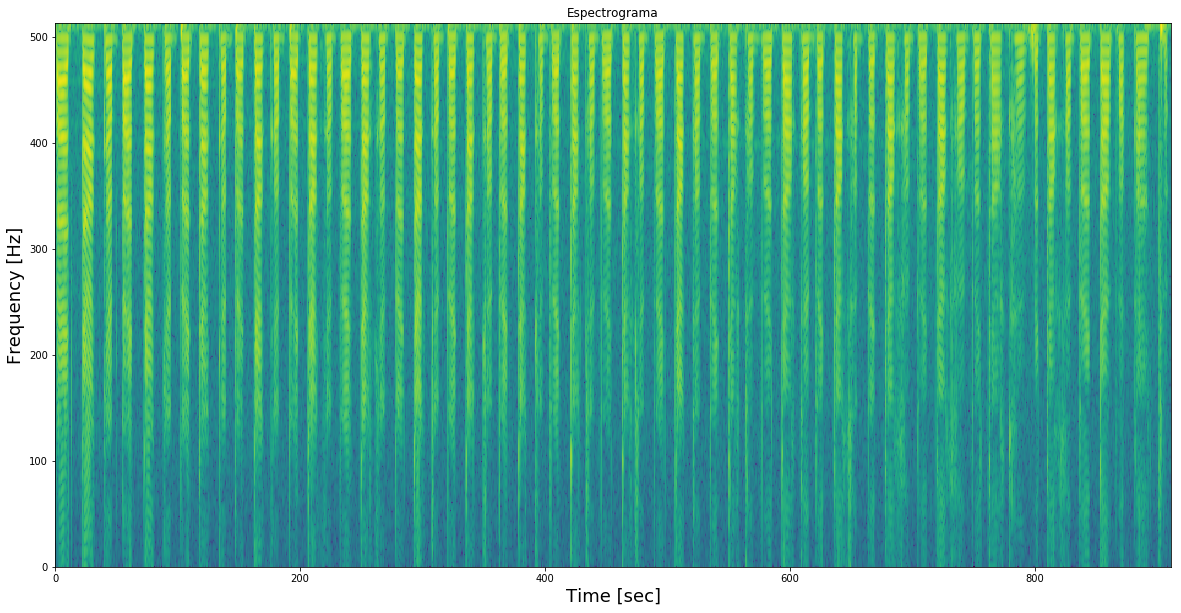

In [79]:


plt.figure(figsize=(20,10))
plt.title('Espectrograma')
plt.pcolormesh(spect)
plt.ylabel('Frequency [Hz]', fontsize=18)
plt.xlabel('Time [sec]', fontsize=18)
plt.show()
# como cambia en el tiempo la energia espectral de la señal

Encontramos la mejor resolución por formula

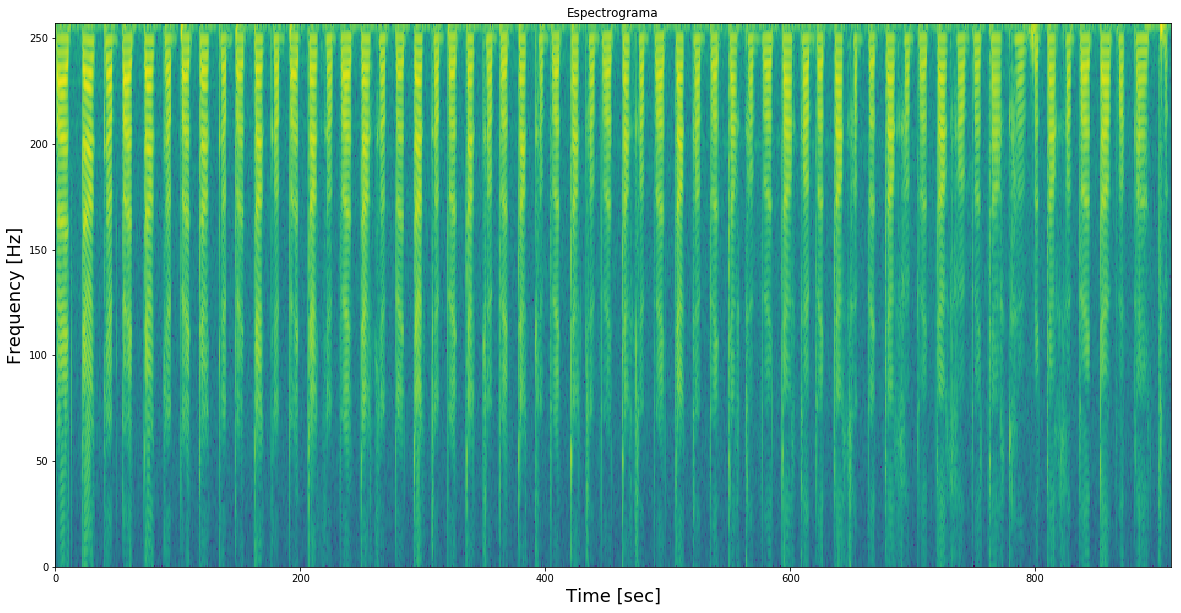

512

In [81]:
espectro,nfft=powerspec(np.vstack(frames),fs,size)
#Para mejor visualizacion
spect=np.flipud(np.log(espectro).T)

plt.figure(figsize=(20,10))
plt.title('Espectrograma')
plt.pcolormesh(spect)
plt.ylabel('Frequency [Hz]', fontsize=18)
plt.xlabel('Time [sec]', fontsize=18)
plt.show()
# como cambia en el tiempo la energia espectral de la señal
nfft

#### Relacion de alta frecuencia con baja frecuencia

Primero pasaremos de bins a frecuencias

In [83]:


freq = np.arange(0, (nfft/2-1)+1)*fs/nfft


Rangos de frecuencia de corte de altas y bajas frecuencia, de acuerdo a un analisis en varios dialectos.

Para más información: Ueda, K., & Nakajima, Y. (2017). An acoustic key to eight languages/dialects: Factor analyses of critical-band-filtered speech. Scientific reports, 7, 42468.

In [25]:
fc_list = [540,1700,3300] #Frecuencia de corte

En esta parte recorreremos el espectro para ver cuales seran altas y cuales serán bajar frecuencia, calcular el radio y pasarlo a escala logaritmica

In [131]:
vlhr = []
for fc in fc_list:
    hfreq = np.where(freq>fc)[0]
    lfreq = np.where(freq<=fc)[0]  
    he = []
    le = []
    for iframe in range(espectro.shape[0]):
        he.append(np.sum(np.abs(espectro[iframe][hfreq]))/len(espectro[iframe][hfreq]))
        le.append(np.sum(np.abs(espectro[iframe][lfreq]))/len(espectro[iframe][lfreq]))
    he = np.asarray(he)
    le = np.asarray(le)
    vlhr.append(10*np.log(np.abs(le)/np.abs(he)))

vlhr=np.vstack(vlhr).T    
vlhr.shape

(911, 3)

In [132]:
media_energia=np.mean(vlhr, axis=0)
std_energia=np.std(vlhr, axis=0)
skewenrss_energia=skew(vlhr)
kurtosis_energia=kurtosis(vlhr)
print('Media',media_energia, 'STD', std_energia, 'Skew', skewenrss_energia, 'Kurtosis', kurtosis_energia)

Media [31.66144215 40.27772637 46.85357822] STD [23.67995432 16.89096487 19.17626584] Skew [ 0.24494596  0.08679551 -0.43768501] Kurtosis [-0.94055072  0.30978902  0.10314682]


#### Coeficientes Ceptrales en la escala de Mel (MFCCs)

In [133]:
from scipy.fftpack import dct #Transformada de coseno discreta

Filtro Pre-Emfasis

$$y(t)=x(t)-\alpha x(t-1)$$

$$\alpha -> [0.95, 0.97]$$

In [28]:
alpha = 0.97


In [29]:
emphasized_signal = np.append(standard_X[0], standard_X[1:] - alpha * standard_X[:-1])
emphasized_signal

array([ 0.05051385,  0.00520033,  0.01183036, ...,  0.00799237,
       -0.01103599, -0.00286397])

Framing

In [91]:
#ventana de 20ms con solape de 10 ms
frames=extract_windows(emphasized_signal, size, step)
len(frames)

911

Window

$$ w(n)=0.54-0.46\cos{(\frac{2\pi n}{N-1})} $$

$$0\leq n\leq N-1$$

$N$: Longitud de la ventana

In [93]:
frames *= np.hamming(size) #size=20ms

Transformado Fourier y Espectro de potencia

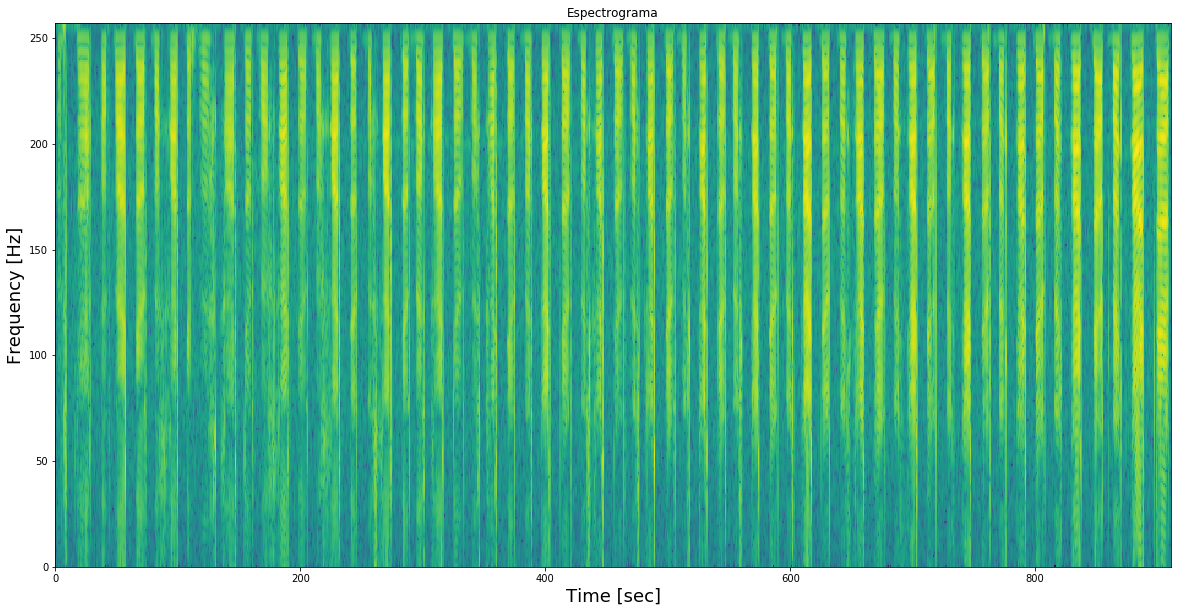

In [95]:
pow_frames, NFFT=powerspec(frames, fs, size)
spect=np.flip(np.log(pow_frames.T))

plt.figure(figsize=(20,10))
plt.title('Espectrograma')
plt.pcolormesh(spect)
plt.ylabel('Frequency [Hz]', fontsize=18)
plt.xlabel('Time [sec]', fontsize=18)
plt.show()

Banco de Filtros

$$m=2595 \log_{10} (1+ \frac{f}{700})$$
$$f=700(10^{m/2595}-1)$$

$f$:frecuencia

$m$: mel

In [98]:
samplerate=8000 #Este es doble de la frecuencia maxima a la que normalmente hablamos los seres humanos
lowfreq=0
highfreq= samplerate/2

nfilt=64


$$H_{m}=\left\{\begin{matrix}
 0 & & k<f(m-1)\\ 
 & \\ 
\frac{k-f(m-1)}{f(m)-f(m-1)} & & f(m-1) \leq k < f(m))\\ 
 & \\ 
1 &  & k=f(m))\\ 
 & \\ 
\frac{f(m+1)-k}{f(m+1)-f(m)} &  & f(m)<k \leq f(m+1)\\ 
 & \\ 
 0 & & k>f(m-1))
\end{matrix}\right.$$

In [101]:

# compute points evenly spaced in mels
lowmel = 2595 * np.log10(1+lowfreq/700.0)

highmel =2595 * np.log10(1+highfreq/700.0)
print(lowmel, highmel)
melpoints = np.linspace(lowmel,highmel,nfilt+2)
# our points are in Hz, but we use fft bins, so we have to convert
#  from Hz to fft bin number
bin = np.floor((nfft+1)*(700*(10**(melpoints/2595.0)-1) )/samplerate)

fbank = np.zeros([nfilt,int(nfft/2+1)])

for j in range(0,nfilt):
    for i in range(int(bin[j]),int(bin[j+1])):
        fbank[j,i] = (i - bin[j])/(bin[j+1]-bin[j])
        
    for i in range(int(bin[j+1]),int(bin[j+2])):
        fbank[j,i] = (bin[j+2]-i)/(bin[j+2]-bin[j+1])


0.0 2146.06452750619


<img src="mel_filters.jpg">

Multiplicamos el banco de filtros

In [104]:
spec_mel = np.dot(pow_frames,fbank.T)
spec_mel = np.where(spec_mel == 0.0, np.finfo(float).eps, spec_mel)
spec_mel=np.log(spec_mel)


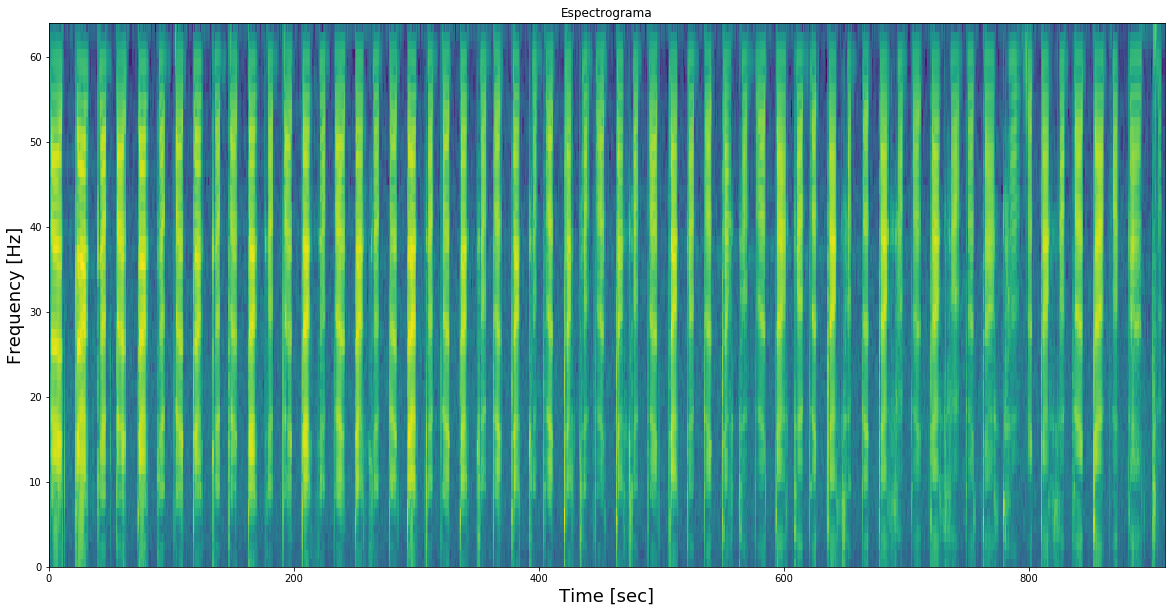

In [105]:
plt.figure(figsize=(20,10))
plt.title('Espectrograma')
plt.pcolormesh(np.flipud(spec_mel.T))
plt.ylabel('Frequency [Hz]', fontsize=18)
plt.xlabel('Time [sec]', fontsize=18)
plt.show()

Mel-frequency Cepstral Coefficients (MFCCs)

In [51]:
def lifter(cepstra,L=22):
    if L > 0:
        nframes,ncoeff = np.shape(cepstra)
        n = np.arange(ncoeff)
        lift = 1+ (L/2)*np.sin(np.pi*n/L)
        return lift*cepstra
    else:
        # values of L <= 0, do nothing
        return cepstra

In [52]:
num_ceps=12 #Numero de coeficientes que vamos a extraer de Mel
cep_lifter=22

In [107]:
mfcc = dct(spec_mel, type=2, axis=1, norm='ortho')[:,:num_ceps]
mfcc = lifter(mfcc,cep_lifter)
mfcc.shape

(911, 12)

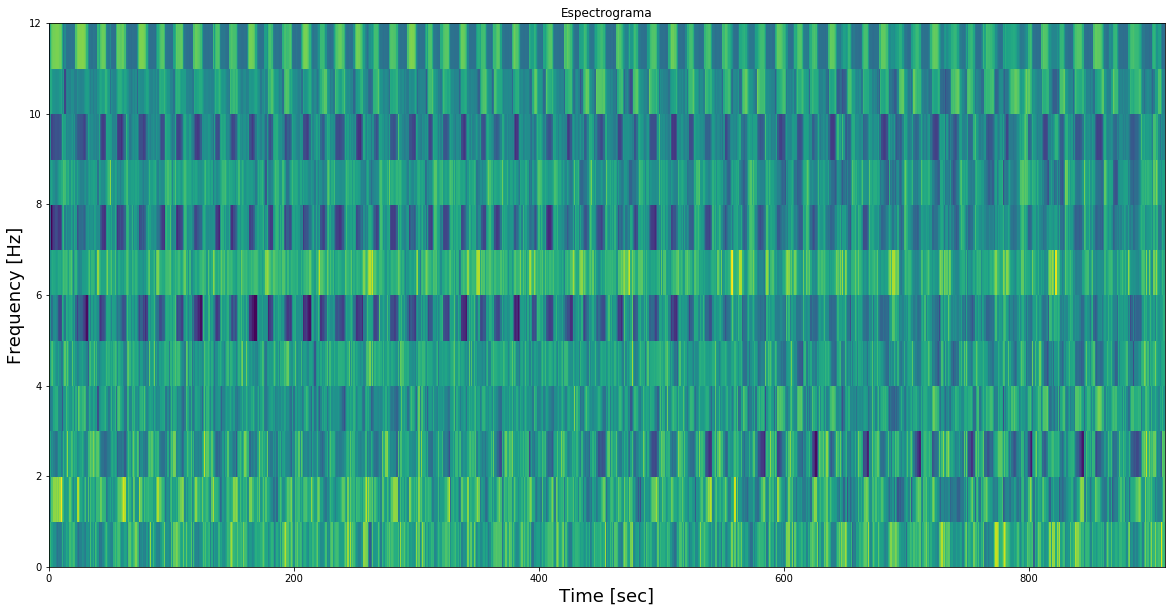

In [106]:
plt.figure(figsize=(20,10))
plt.title('Espectrograma')
plt.pcolormesh(np.flipud(mfcc.T))
plt.ylabel('Frequency [Hz]', fontsize=18)
plt.xlabel('Time [sec]', fontsize=18)
plt.show()

Mean Normalization

In [108]:
mfcc -= (np.mean(mfcc, axis=0) + 1e-8)

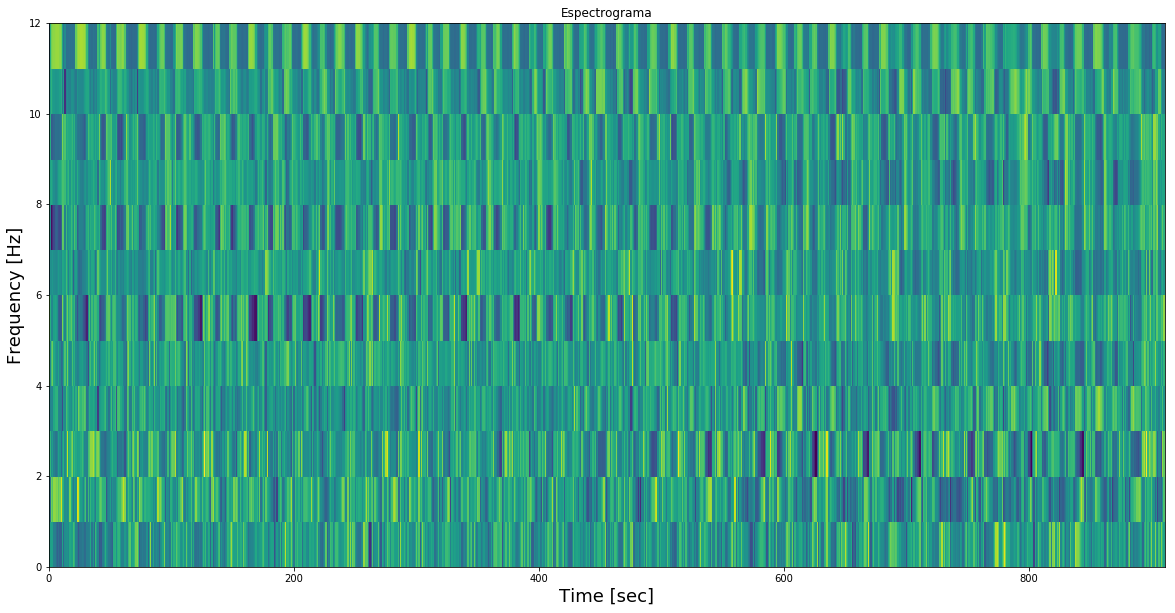

In [109]:
plt.figure(figsize=(20,10))
plt.title('Espectrograma')
plt.pcolormesh(np.flipud(mfcc.T))
plt.ylabel('Frequency [Hz]', fontsize=18)
plt.xlabel('Time [sec]', fontsize=18)
plt.show()